## Matplotlib

### G√©n√©ralit√©s

Jusque ce tutoriel, vous avez peut-√™tre √©t√© un peu frustr√©s des affichages que nous avons utilis√©s, car bon, afficher des longues listes de donn√©es de mani√®re brute n'est pas toujours dr√¥le ... Dans ce tutoriel, nous allons enfin apprendre √† tracer des graphes :

* en commen√ßant par la base : un trac√© d'une ligne.
* on verra ensuite comment formater les figures pour les rendre plus belles.
* on examinera ensuite comment faire des trac√©s plus avanc√©s : les images, les `scatter`, les `patch` et les surfaces 3d.
* on regardera comment exporter ces figures en un format utilisable ailleurs
* et enfin on √©voquera les trac√©s anim√©s ou interactifs sous Jupyter.

Les trac√©s sous Matplotlib sont g√©r√©s par le sous-module `matplotlib.pyplot`, que nous devons tout d'abord importer avant de tracer quoi que ce soit. Ce sous-module contient des objets de type `Figure`, `Axes`, `Lines`, qui sont les briques √©l√©mentaires nous permettant de construire un graphe. Les `Figure` peuvent contenir un ou plusieurs `Axes`, qui sont des zones de trac√©s [vous pouvez les voir comme des paires d'axes $(Oxy)$ ou $(Oxyz)$], qui eux-m√™mes peuvent contenir chacun plusieurs `Lines` (ou d'ailleurs, d'autres objets). Le diagramme ci-dessous vous indique, √† gauche, les liens _logiques_ qui existent entre ces diff√©rents _objets_ : les `Axes`, par exemple, _appartiennent_ √† un objet `Figure` qui est son _parent_, et _poss√®dent_ des objets `Lines` qui sont leurs _enfants_. √Ä droite, j'ai indiqu√© la hi√©rarchie _visuelle_ entre ces objets : les lignes sont bien trac√©es le long d'une paire d'axes, qui est elle-m√™me plac√©es dans la `Figure` g√©n√©rale. 

![img](./resources/figure_hierarchy.png)

------------------------------------------------------------

### Trac√© d'une figure simple avec `.plot()`

_"Comment est-ce que tout cela fonctionne en pratique si je veux juste tracer mes donn√©es ?_", me direz-vous ? Eh bien, allons-y : 

* on va d'abord cr√©er une `Figure` avec la commande `plt.figure()` directement 
* on va ensuite y ajouter des `Axes`: on appelle pour cela une _m√©thode_ des `Figure` nomm√©e `add_axes()`.
* et pour _tracer_ des donn√©es dans des `Axes`, on va appeler une _m√©thode_ des `Axes`, par exemple simplement `plot`.



La m√©thode `add_axes()` n√©cessite un argument obligatoire en entr√©e, qui la position de l'objet `Axes` dans la `Figure` selon la convention `[bord gauche, bord bas, largeur, hauteur] `. Tous ces param√®tres prennent des valeurs relatives de 0 √† 1:
* pour le bord gauche, $0$ va placer les axes tout √† gauche, et $1$ va placer les axes tout √† droite. 
* pour le bord du bas, c'est $0$ tout en bas et $1$ tout en haut
* pour la largeur, $0$ est infiniment fin et $1$ prend toute la largeur
* et il en va de m√™me pour la hauteur des `Axes`
Je vous conseille de laisser de la marge aux bords pour les axes, notamment si vous voulez donner un nom √† l'axe $x$ et $y$ de vos `Axes`. Un choix raisonnable de valeurs est : `[0.15,0.15,0.7,0.7]`. 

On appelle ensuite la m√©thode `.plot()` des axes. Celle-ci peut prendre en entr√©e des tableaux Numpy, __mais s'en sort √©galement bien avec les colonnes de tableaux Pandas, des listes en Python pur, etc__, donc il est relativement ind√©pendant de la mani√®re dont vous g√©rez vos nombres sous Python. 

Ma m√©thode est peut-√™tre un peu p√©destre pour les habitu√©s de MATLAB, mais vous verrez, cela va nous √©viter de nous emm√™ler les pinceaux plus tard si on veut rajouter des choses dans des graphes :-). 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,2*np.pi,500)
y = np.cos(x)

my_fig = plt.figure()
my_ax = my_fig.add_axes([0.15,0.15,0.7,0.7])
my_line = my_ax.plot(x,y)

M√™me sans rien demander, notre environnement de travail a compris qu'il fallait √† un moment afficher notre figure. Sympa, non ? Vous pouvez ensuite tout √† fait ajouter des nouvelles lignes √† vos `Axes` initiaux depuis une nouvelle cellule, mais dans ce cas il va vous falloir demander de re-tracer une nouvelle fois la `Figure` qui contient ces `Axes`. On peut faire √ßa en √©crivant juste `my_fig` en dernier dans la cellule :

In [ ]:
z = np.sin(x)
my_other_line = my_ax.plot(x,z)
my_fig

Certains d'entre vous, les plus hackeurs probablement, vont paniquer : les bords des axes ont disparu ! En fait, non, ne vous inqui√©tez pas. Si vous avez choisi un th√®me _sombre_ pour votre √©diteur de code, sachez que lors de l'appel √† `my_fig`, le pourtour de la figure est transparent. Les nombres des axes √©tant noirs, ils deviennent invisibles lors de l'affichage... Gloups ! C'est peut-√™tre le moment de changer pour le magnifique th√®me [Solarized-light](https://ethanschoonover.com/solarized/) :-) . 

Si vous voulez aller un peu plus vite et obtenir directement une `Figure` et des `Axes`, vous pouvez utiliser la commande `plt.subplots()` avec un `s` √† la fin. Dans ce cas, Matplotlib va placer l'`Axes` automatiquement. Une chose en moins √† g√©rer ! 

In [ ]:
fig, ax = plt.subplots()
line = ax.plot(x,3*z)

-----------------------------------------------

### Formater les figures 

Dans la figure pr√©c√©dente, on a laiss√© Matplotlib faire plein de choix au niveau de la taille des figures √† l'√©paisseur des lignes. Mais sachez que quasiment tout dans ces figures est modifiable. Nous allons voir dans cette section ce que l'on peut modifier dans les `Lines`, puis les `Axes`, puis les `Figure` et m√™me `Matplotlib.pyplot()` lui-m√™me (si si !). Si vous voulez une antis√®che rapide, jetez un oeil au graphe ci-dessous, qui liste la plupart des propri√©t√©s que vous voudrez √©diter et la mani√®re d'y acc√©der. 


#### Les Lignes

Il est possible de r√©gler l'aspect de chaque ligne, son √©paisseur, les √©ventuels marqueurs ainsi que la couleur de tous ces objets. Voyons donc dans l'ordre comment r√©gler toutes ces choses !

##### √âpaisseur, tirets, marqueurs

Pour changer le format de votre ligne, vous pouvez l'effectuer lors de l'appel √† `.plot()`, en lui passant l'argument `'linestyle'`. Vous avez alors le choix entre une ligne pleine `'-'`, des tirets `'--'`, des pointill√©s `':'`, ou un trait mixte `'-.'`, voire rien du tout avec `'None'`. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,4*np.pi,100)
fig, ax = plt.subplots()
line = ax.plot(x,np.sin(x), linestyle =':')

Pour changer l'√©paisseur de votre trait, rajoutez l'argument `linewidth` lors de l'appel √† `.plot()`. Par d√©faut, l'√©paisseur de 1 choisie par Matplotlib est en effet un peu grosse : 

In [ ]:
x = np.linspace(0,4*np.pi,100)
fig, ax = plt.subplots()
line = ax.plot(x,np.sin(x), linewidth=0.5)

Vous pouvez d√©cider √©galement d'ajouter des marqueurs, en ajoutant l'option `'marker'`. Vous avez alors le choix entre `'x'` (un x), `'+'` (un +, pardi), `'*'` (une √©toile, bien s√ªr), `'s'` (un carr√©), `'d'` (un losange), `'o'` (un cercle), `'v'`, `'>'`, `'<'`, `'^'` (des triangles qui pointent dans diverse directions), [et bien d'autres ...](https://matplotlib.org/stable/api/markers_api.html). Si vous voulez tracer juste les marqueurs et non la ligne qui va avec, n'oubliez pas de pr√©ciser `linestyle='None'` !

In [ ]:
x = np.linspace(0,4*np.pi,50)
fig, ax = plt.subplots()
line = ax.plot(x,np.sin(x), marker='d', linestyle ='None')

##### Couleurs

Vous pouvez √©galement sp√©cifier la couleur d'une ligne au moment o√π vous la tracez. Pour sp√©cifier une couleur de ligne lors du trac√©, ajoutez l'option `color` et pr√©cisez-lui une couleur. Vous pouvez sp√©cifier les couleurs : 

* Par un nom _bref_ d'une lettre √† la fa√ßon de MATLAB, avec `'b'` (bleu), `'r'` (rouge), `'g'` (vert), `'y'` (jaune), `'c'` (cyan), `'m'` (magenta), `'w'` (blanc), `'k'` (noir)
* Via un nom de couleur HTML, par exemple `'orchid'` ou `'peru'` (_si, si !_). La liste compl√®te de ces couleurs est [disponible ici](https://www.w3schools.com/colors/colors_names.asp).
* En pr√©cisant un code hexad√©cimal pour la couleur. Ces codes sont du type `#RRGGBB` au format hexad√©cimal, c'est √† dire en base 16. Vous pouvez rapidement convertir des triplets `R,G,B` (chacun allant de 0 √† 255) en code hexad√©cimal, m√™me [sur Google](https://www.google.com/search?q=rgb+to+hex). Ce code devra √™tre compris entre des guillemets pour √™tre correctement interpr√©t√©.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,4*np.pi,100)
fig, ax = plt.subplots()
line = ax.plot(x,np.sin(x), color='r')                     # MATLAB-style color
line = ax.plot(x,np.sin(x+np.pi/3), color='goldenrod')     # HTML named color : yes, goldenrod is a color !
line = ax.plot(x,np.sin(x+2*np.pi/3), color='#55aaFF')     # RGB values if you want maximum flexibility 

Si vous avez des marqueurs, comment est-ce que √ßa marche ? L'option `color` va remplir la ligne et le marqueur d'une couleur uniforme. Mais, si vous √™tes un esth√®te comme moi, vous aurez peut-√™tre plus envie de pr√©ciser une couleur pour _le bord_ du marqueur appel√©e `markeredgecolor`, et une autre pour le _fond_ de celui-ci `markerfacecolor`. Si vous √™tes encore plus un furieux, sachez que vous pouvez √©galement r√©gler l'√©paisseur _du trait du bord du marqueur_, `markeredgewidth`, qui vaut √©galement 1 par d√©faut. Certains marqueurs, comme `'+'` et `'x'`, n'ont pas d'_int√©rieur_, il n'est donc pas n√©cessaire de r√©gler leur `markerfacecolor`. 

Essayez de jouer avec la figure suivante pour la rendre moins moche ! Une bonne approche consiste √† choisir comme couleur de bord une version 'un peu plus sombre' de la couleur du fond du marqueur. 

In [ ]:
x = np.linspace(0,4*np.pi,50)
fig, ax = plt.subplots()
line = ax.plot(x,np.sin(x), linestyle='--', marker='s', markeredgecolor='teal', markerfacecolor='orange', markeredgewidth=3)      

__Exercice__ : 

* Que se passe-t-il si je pr√©cise √† la fois `color`, `markeredgecolor` et `markerfacecolor` ? Est-ce que certains choix de couleurs sont '√©cras√©es' en fonction de l'ordre d'appel des arguments ?

#### Les Axes 

Les Axes sont le coeur de Matplotlib, donc ne soyez pas √©pouvant√©.e.s devant la longue liste de choses qu'il est possible d'√©diter. Nous allons nous concentrer sur certaines propri√©t√©s-cl√©, sachant que nous avons d√©j√† vu comment _placer_ nos `Axes` dans la figure*. Contrairement aux objets `Lines`, il est plus utile de formater les axes _apr√®s_ les avoir cr√©√©s. On va donc appeler tout un tas de _m√©thodes_ du type `ax.set_machin()` afin de rendre nos figures encore plus belles !

<small>* si vous n'√™tes pas content de la position de vos axes, vous pouvez les bouger avec la m√©thode `ax.set_position()` apr√®s avoir trac√© vos donn√©es </small>

##### Limites en x et y

Pr√©ciser les limites de vos axes est assez simple ! Pour cela, vous pouvez utiliser les m√©thodes `ax.set_xlim()` et `ax.set_ylim()`. Ceux-ci prennent en entr√©e une liste de deux nombres, le second √©tant, vous l'aurez devin√©, plus grand que le premier... logique. √âtant une personne tr√®s positive, je n'aime pas trop la partie n√©gative des graphes, je choisis donc : 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,4*np.pi,100)
fig, ax = plt.subplots()
line = ax.plot(x,np.sin(x))
ax.set_xlim([0,6])
ax.set_ylim([0,1])

__Exercice__ : R√©tablissez l'√©quilibre cosmique de l'axe $y$, et essayez de choisir une valeur de $x$ maximale qui tombe exactement sur une (demi)-p√©riode de ma fonction.

##### Etiquettes des axes et titre

Les √©tiquettes de donn√©es et les titres ne sont pas des simples cha√Ænes de caract√®res, et les objets qui leur correspondent sont en fait assez difficiles √† trouver dans la hi√©rarchie des figures. Matplotlib nous fournit donc gracieusement les trois m√©thodes `ax.set_xlabel()`, `ax.set_ylabel()` et `ax.set_title()` pour pr√©ciser les √©tiquettes des donn√©es des axes $x$ et $y$ et le titre. Voyons leur effet en action : 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,4*np.pi,50)
fig, ax = plt.subplots()
line = ax.plot(x,np.arctan(x))
xlb = ax.set_xlabel('Kittens')
ylb = ax.set_ylabel('Happiness')
ttl = ax.set_title('Kitten Yield Curve')

Vous pouvez mettre un peu de $\LaTeX$ dans vos √©tiquettes de donn√©es, Matplotlib le comprend un peu. Mais faites attention, avant d'√™tre interpr√©t√©e par $\LaTeX$, la cha√Æne que vous √©crivez va √™tre √©valu√©e (l'√©quivalent de la fonction `print()`). Donc si vous voulez √©crire du code $\TeX$ avec des barres obliques  `'\'`, vous devrez les doubler dans votre cha√Æne Python originale ! Voyez donc dans l'exemple suivant, ce √† quoi ressemble mon `ytex_label` une fois que je l'affiche : 

In [ ]:
x = np.linspace(0,4*np.pi,50)
fig, ax = plt.subplots()
line = ax.plot(x,np.sin(x))

ytex_label = '$x - \\frac{x^3}{3!} + \\frac{x^5}{5!} - \\ldots$'    # Will be
xtex_label = '$x$'
print(ytex_label)
xlb = ax.set_xlabel(xtex_label)
ylb = ax.set_ylabel(ytex_label)

##### Les graduations, pour les gens ayant des tic(k)s

Cette fois-ci, on va se concentrer sur les graduations de vos graphes. Elles sont compos√©es de _trois_ √©l√©ments, les `major ticks`, les `major tick labels` et les `minor ticks`. Je vais d√©laisser les `minor ticks` et ne voux expliquer que le fonctionnement des autres. La mani√®re la plus simple de choisir la position de vos `major ticks` est d'utiliser la m√©thode `ax.set_xticks()` et de lui donner en entr√©e la liste des valeurs (en Python, donc) √† laquelle vous voulez voir des graduations. Par d√©faut, Matplotlib va afficher la valeur de $x$ correspondant √† la position de la graduation : si on met une graduation √† $x = 9$, eh bien il va afficher ... $9$, sans surprise. 

Vous pouvez modifier ce comportement en utilisant la m√©thode `ax.set_xticklabels()`. Celle-ci prend en entr√©e un tableau de cha√Ænes de caract√®res (`str`) de la m√™me longueur que celui pass√© √† `set_xticks()`, mais hormis cela vous pouvez √™tre tr√®s cr√©atifs :

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,4*np.pi,100)
fig, ax = plt.subplots()
line = ax.plot(x,np.sin(x), color='r')                     # MATLAB-style color
line = ax.plot(x,np.sin(x+np.pi/3), color='goldenrod')     # HTML named color : yes, goldenrod is a color !
line = ax.plot(x,np.sin(x+2*np.pi/3), color='#55aaFF')     # RGB values if you want maximum flexibility 

xtck = ax.set_xticks([0,1,3,9,12])
ytck = ax.set_yticks([-1,-0.5,0.0,0.5,1])
xtlb = ax.set_xticklabels(['jean', 'paul', 'firmin', 'olivia', 'layella'])

Si vous voulez √©diter plus en d√©tail les graduations de votre trac√©, vous pouvez vous r√©ferer √† [la page Matplotlib permettant de les formater](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html).

__Exercice__ : Soyez un tr√®s bon √©l√®ve et placez des `x major ticks` pour tous les multiples de $\pi$, puis affichez explicitement ces valeurs comme $\pi, 2\pi, 3\pi$ en $\LaTeX$ dans les `x major tick labels` de la figure ci-dessus.

##### Axes Logarithmiques

Si vous √™tes astrophysicien.ne, vous ne jurez probablement que par les axes en √©chelle logarithmique car vos donn√©es sont de toute mani√®re trop peu pr√©cises pour ne pas juste ressembler √† un fouillis en √©chelle normale. De la m√™me mani√®re, les rh√©ologues appr√©cient de pouvoir examiner la r√©ponse de leurs fondus de polym√®res sur de nombreuses d√©cades en $x$. Matplotlib est l√† pour nous, une fois de plus, avec les m√©thodes `ax.set_xscale()` et `ax.set_yscale()`, qui prennent en entr√©e des cha√Ænes de caract√®re, principalement `'lin'` ou `'log'` [(voir ici pour d'autres choix si vous √™tes un original)](https://matplotlib.org/stable/gallery/scales/scales.html).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.logspace(-3,3,1000) # A linspace but in log scale. Neat ! 
fig, ax = plt.subplots()
ax.plot(x,1 + x**0.5)
ax.set_xscale('log')
ax.set_yscale('log')

__Exercice__ : Trouvez un jeu d'axes $x$ et $y$ (`'log'` ou `'lin'`) pour lequel les donn√©es `x` et `y` suivantes s'alignent selon une droite : 

In [ ]:
import matplotlib.pyplot as plt

x = [65.0, 18.6, 28.1, 39.0, 114.8, 11.1, 15.3, 24.0, 20.5, 78.9, 59.2, 33.8, 46.1,94.1, 12.2]
y = [4.17, 2.92, 3.37, 3.69, 4.70 , 2.40, 2.74, 3.18, 3.02, 4.31, 4.02, 3.5, 3.83, 4.54, 2.50]

fig, ax = plt.subplots()
plt = ax.plot(x,y, 'kx')

##### Grille et couleur de fond

Vous pouvez enfin rajouter une grille dans vos axes afin de vraiment avoir cet aspect distingu√© qu'ont certains graphes Excel ou infographies. Comment ? Tout simplement gr√¢ce √† la m√©thode `ax.grid`, √† laquelle vous pouvez renvoyer `True` ou `False`. Sinon, vous pouvez lui donner en argument : 
* les axes sur lesquelles la grille s'applique avec `which`, qui peut √™tre √©gal √† `'x'` ou `'y'` ou `'both'` 
* une couleur avec `color`  
* un style de ligne avec `linestyle`
* une √©paisseur de ligne avec `linewidth`

La couleur du fond des `Axes`, se r√®gle avec `ax.set_facecolor()` (il est _de retour_). On peut donc produire la merveille suivante : 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3,3,100) 
fig, ax = plt.subplots()
ax.plot(x,1 + np.cbrt(x), color='lightcoral', linewidth=4)
ax.set_facecolor('lime')
ax.grid(which='both', color='darkorchid', linestyle='--', linewidth=3)
ttl = ax.set_title('My Masterpiece')

#### Les figures

Les figures ont comparativement moins d'options que vous pouvez param√©trer. Les deux principales propri√©t√©s de ces figures sont leur largeur, donn√©e par `fig.set_figwidth()` et sa hauteur, `fig.set_figheight()`. _Par d√©faut_, la taille de ces figures est de 6.4 pouces de large et 4.8 pouces de haut (merci les √âtats-Uniens ...), ce qui fait 16.3 cm par 12.2 pour les personnes civilis√©es.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f, ax = plt.subplots()
f.set_figwidth(3)
f.set_figheight(2)

x = np.linspace(-3,3,100)
lin = ax.plot(x, 1/(1+x**2))

#### Pyplot _lui-meme_ : les feuilles de style!

Il est possible de modifier le comportement de `pyplot` lui-m√™me : dans ce cas, _tous_ les graphes que vous tracerez ensuite seront affect√©s. Bien souvent, il faut aller trifouiller dans une bo√Æte de param√®tres g√©n√©raux de `matplotlib.pyplot` appel√©e `rcParams`. Cet objet ressemble √† un dictionnaire et poss√®de de _tr√®s nombreuses_ cl√©s, et est tr√®s puissante. Un aper√ßu de ce que vous pouvez faire avec `rcParams` [est disponible en suivant ce lien](
https://matplotlib.org/stable/tutorials/introductory/customizing.html). Dans cette section, je vais volontairement √©viter d'utiliser cette bo√Æte √† outils compliqu√©e et simplement √©voquer les _feuilles de style_ (qui ne passent pas par `rcParams`).

La fonction `plt.style.use()` vous permet de choisir parmi une des [diverses feuilles de style disponibles](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) sous Matplotlib. Si vous √™tes un esth√®te (vous avez raison) et que vous voulez utiliser le magnifique th√®me `'Solarize_Light2'` (pas de `d`, un `_` et un `2`), vous pouvez alors enfin avoir vos graphes et votre interface en harmonie. De m√™me, si vous √™tes un hacker¬Æ et que vous voulez des graphes sur fond noir, le th√®me `'dark_background'` est fait pour vous.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('Solarize_Light2')
x = np.linspace(-3,3,100)

f1, ax1 = plt.subplots()
f1.set_figwidth(3), 
f1.set_figheight(2)
lin11 = ax1.plot(x, 1/(1+x**2))
lin12 = ax1.plot(x, x/(1+x**2))

f2, ax2 = plt.subplots()
f2.set_figwidth(3), 
f2.set_figheight(2)
for i in range(7):
    ln = ax2.plot(x, x**2 - i*x)

#### Antis√®che 

Je reprends ici une antis√®che listant les diverses m√©thodes qui s'appliquent √† votre figure (gracieusement reprise depuis le site de Matplotlib)


![img](./resources/matplotlib_figure.png)

--------------------------------------------

### Trac√©s avanc√©s

Tracer des lignes et des s√©ries de symboles, c'est fort joli, mais parfois, il va vous falloir tracer _autre chose_. Comment se d√©brouille-t-on dans le cas d'une _image_, d'une _surface_, ... ? Nous allons nous charger de ces cas un peu plus r√©calcitrants dans cette section.

#### Les images

Afficher des images s'effectue avec la m√©thode `ax.imshow()`, qui prend en entr√©e un tableau 2d de coordonn√©es. Simple, non ? Pour les amateurs de MATLAB, cette fonction ressemble beaucoup √† `imagesc`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.style.use('default')

x = np.linspace(-3,3,1000)
y = np.linspace(-3,3,1000)
[X,Y] = np.meshgrid(x,y)   # Building 2d X and Y scales both spanning from -5 to 5
Z = np.sinc(X**2 + Y**2)   # Complicated but circular function 
im = ax.imshow(Z)

Oh ! La belle bleue. Mais ... mais ... attendez ! Qui a choisi les couleurs ? Et mes axes ? Mauvaise nouvelle, on ne peut pas juste donner √† `imshow()` des coordonn√©es $X$ et $Y$ √† 2d pour qu'il trace les pixels aux bons endroits. Si vous voulez _vraiment_ faire √ßa, vous pouvez utiliser √† la place la fonction `ax.pcolor()`, mais sachez qu'elle est _lente_ quand vos tableaux de donn√©es deviennent grands !

##### Placer ses axes avec `ax.imshow()`

Le choix de vos axes va s'effectuer en ajoutant une option nomm√©e `extent` lors de l'appel √† `ax.imshow()`. Vous pouvez alors pr√©ciser les limites en $x$ et $y$ de vos donn√©es, avec une liste ou un tableau du type `[bord_gauche, bord_droite, bord_bas, bord_haut]`. Dans notre cas, il est assez raisonnable de choisir comme bords les valeurs extr√©males de $X$ et $Y$ : 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x = np.linspace(-5,5,300)
[X,Y] = np.meshgrid(x,x)   # Building 2d X and Y scales both spanning from -5 to 5
my_bounds = [np.min(X), np.max(X), np.min(Y), np.max(Y)]

Z = np.sinc(np.sqrt(X**2 + Y**2))   # Complicated but circular function 
im = ax.imshow(Z, extent=my_bounds)

##### Choisir ses couleurs 

Vous pouvez changer deux choses si vous voulez r√©gler les couleurs de votre image. La premi√®re chose qui vient √† l'esprit consiste √† changer de _palette_ de couleurs (_colormaps_ en anglais). Il en existe √† nouveau de [tr√®s nombreuses _colormaps_](https://matplotlib.org/stable/tutorials/colors/colormaps.html), j'en liste seulement quelques-unes d'int√©r√™t ici. __Attention aux majuscules et minuscules__ ! 

![img](./resources/mpl_cmaps.png)

Vous pouvez alors, soit appeler la fonction `ax.imshow()` et lui pr√©ciser en argument suppl√©mentaire l'option `cmap` avec une des palettes disponibles, par exemple `'Magma'`. √Ä l'inverse, si l'image est d√©j√† trac√©e, vous pouvez utiliser la m√©thode `im.set_cmap()` de l'image elle-m√™me pour changer la palette, en lui donnant √† nouveau √† 'manger' la palette de vos r√™ves. 

In [ ]:
im.set_cmap('hsv')
fig

__Exercice__ : Amusez-vous √† changer la palette de couleurs et essayez de trouver la plus adapt√©e et la moins adapt√©e afin de comprendre √† quoi ressemble notre fonction ${\rm sinc}$. 

Par d√©faut, l'√©chelle de couleurs s'√©tend du minimum au maximum de la plage de donn√©es que vous lui donnez √† manger : par exemple, le bleu tr√®s fonc√© de `viridis` va correspondre √† `min(Z)` et le jaune fluo √† l'autre extr√©mit√© de la palette va correspondre √† `max(Z)`. Si vous voulez que les couleurs extr√™mes de vos palettes correspondent √† la place √† des valeurs que vous pr√©cisez explicitement, vous pouvez utiliser les options `vmin` et `vmax` lors de l'appel √† la m√©thode `.imshow()`, par exemple : 

In [ ]:
im = ax.imshow(Z, cmap='Spectral', extent=my_bounds, vmin=-0.5, vmax=0.5)
fig

Avec notre choix de `cmap`, `vmin` et `vmax`, on voit ici mieux les lobes positifs (bleus) et n√©gatifs (orange / rouge) de notre fonction ${\rm sinc(r)}$.

__Exercice__ : √† l'heure actuelle, il n'est pas possible d'avoir plus d'un objet `.imshow()` par axe, mais vous pouvez tr√®s bien ajouter des lignes par dessus votre image ! Essayez par exemple de superposer √† l'image pr√©c√©dente des cercles correspondant aux changements de signe de la fonction ${\rm sinc}$ : notez qu'elle est d√©finie ici comme $\sin(\pi r) / (\pi r)$.

In [ ]:
# Chop chop !

##### Les colorbars

Les barres de couleurs sont l√† pour aider le lecteur de la figure afin qu'il sache √† quelle plage de donn√©es correspondent les couleurs. C'est une forme _visuelle_ de ce qu'on a cod√© avec les arguments `vmin` et `vmax` et `cmap`. On peut demander √† Matplotlib de l'afficher pour nous.

Les objets `colorbar` sont en fait des axes et appartiennent √† la figure. On va donc les cr√©er avec `fig.colorbar()`. Nous allons alors indiquer en option l'image que nous venons d'afficher, et Matplotlib se d√©brouillera pour comprendre la palette de couleurs utilis√©e et les valeurs de `vmin` et `vmax`. On peut pr√©ciser un `label` √† l'objet `colorbar`, qui indiquera quelle quantit√© physique correspond √† l'√©chelle de couleurs.

Plus d'informations √† ce sujet [en suivant ce lien](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) !

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x = np.linspace(-5,5,300)
[X,Y] = np.meshgrid(x,x)   # Building 2d X and Y scales both spanning from -5 to 5
my_bounds = [np.min(X), np.max(X), np.min(Y), np.max(Y)]

Z = np.sinc(np.sqrt(X**2 + Y**2))   # Complicated but circular function 
im = ax.imshow(Z, extent=my_bounds, vmin=-1, vmax=1, cmap='RdYlBu')

cb = fig.colorbar(im, label='Z-value')

#### Aires sous la courbe (ou entre courbes)

Si vous √™tes un fanatique de math√©matiques ou d'Isaac Newton, vous aurez peut-√™tre envie dans votre vie de colorer l'aire sous une courbe, voire entre deux courbes. Sous Matplotlib, c'est tr√®s simple. Tracez d'abord vos deux lignes en question, puis utilisez la m√©thode `.fill_between()`. Donnez-lui √† manger l'√©chelle des $x$ puis les deux s√©ries $y_1$, $y_2$, et le tour est jou√© !

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5, 300)
y1 = np.exp(-x**2/2)/(np.sqrt(2*np.pi))
y2 = 1/np.pi/(1 + x**2)

fig, ax = plt.subplots()
ax.plot(x, y1, label='Normal')
ax.plot(x, y2, label='Lorentz')
ax.fill_between(x, y1, y2, color='gold', label='Difference')

lgd = ax.legend()

__Exercices__ : 

* Trouvez un moyen _b√™te et rapide_ pour tracer l'aire sous la courbe Lorentzienne, soit entre $y=0$ et cette courbe.
* Faites en sorte que les aires aient une couleur diff√©rente si la Lorentzienne est plus grande que la loi normale et inversement. Aidez-vous √©ventuellement de la [documentation en ligne](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html).

#### Histogrammes

La syntaxe de trac√© des histogrammes sous Matplotlib reprend celle de [Numpy](./Application_A_Numpy.ipynb#Histogrammes), et va directement tracer l'histogramme √† partir de votre s√©rie de donn√©es et des 'bo√Ætes' (_bins_) que Numpy ou vous-m√™me avez sp√©cifi√©es. Il est √©galement √† nouveau possible de passer l'option `density` pour obtenir une distribution de probabilit√© (pdf). La m√©thode `ax.hist()` renvoie les bo√Ætes (`bins`) et les fr√©quences d'occurrence (les `counts`) en plus de l'objet 'histogramme' √† l'utilisateur. On peut donc √©crire, pour des valeurs distribu√©es selon une loi normale : 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

dat = np.random.normal(scale=1, size=int(1e3))

fig, ax = plt.subplots()
counts, bins, my_hist = ax.hist(dat, bins=np.arange(-4,4,0.1), density=True) # bins and counts are also returned if you want to use them

__Exercice__ : Superposez la loi normale th√©orique : 

$$ \mathcal{N}(x) = \frac{1}{\sqrt{2 \pi}} \exp \left ( - \frac{x^2}{2}\right ) $$

√† la distribution exp√©rimentale. √Ä partir de combien d'√©chantillons la distribution exp√©rimentale est-elle en bon accord (visuel) avec la loi th√©orique ?

#### Nuages de points : les `.scatter()`

√Ä premi√®re vue, il semble superflu de proposer une fonction permettant de tracer des nuages de points, car ... cela est possible simplement avec la m√©thode `.plot()` et en retirant les lignes, non ? Vous avez parfaitement raison. Mais, parfois, il est int√©ressant de coder des informations suppl√©mentaires dans la taille ou la couleur de vos marqueurs, de mani√®re individuelle. Et, malheureusement, `.plot()` n'en est pas vraiment capable, mais coup de chance, c'est pr√©cis√©ment le r√¥le de `.scatter()` !


Prenons un exemple concret de donn√©es de d√©veloppement entre pays fournies gracieusement par l'[ONU √† l'adresse suivante](https://hdr.undp.org/data-center/human-development-index#/indicies/HDI). Ce jeu de donn√©es contient de nombreux indicateurs, comme l'esp√©rance de vie √† la naissance, la consommation de CO2 par habitant, le PIB par habitant, l'indice (agr√©g√©) de d√©veloppement humain, la dur√©e moyenne de l'√©ducation des √©l√®ves, ... et ce pour deux ann√©es, 1990 et 2021. 

Avec _scatter_, je peux afficher plus que deux informations en m√™me temps : 
* je peux regarder si, par exemple, les √©missions de CO2 (axe Y) sont corr√©l√©es √† un PIB plus √©lev√© (axe X) et √† un indice de d√©veloppement humain plus √©lev√© (couleurs) en tenant compte de la taille de chaque population (taille des marqueurs)
* je peux regarder si la progression de l'indice de d√©veloppement humain (HDI) des hommes et des femmes est corr√©l√©e de 1990 √† 2021, tout en affichant le 'point de d√©part' (l'HDI moyen en 1990) de ces pays via les couleurs des symboles. 

Les deux options `c` (pour `color`) et `s` (pour `size`, en tant qu'_aire_ du marqueur) que l'on peut pr√©ciser dans `scatter()` prennent en entr√©e soient une couleur unique, soit un tableau de couleurs (par exemple au format HTML), soit un tableau de valeurs num√©riques de la m√™me taille que la s√©rie de donn√©es initiale. Plus d'informations [en suivant ce lien](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

_Note_ : Cette cellule utilise [Pandas](pandas.pydata.org/), dont je d√©cris en d√©tail le fonctionnement dans [l'Application D](./Application_D_Pandas.ipynb) pour g√©rer les donn√©es.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dat = pd.read_csv('./resources/un_hdr_data.csv')

fig, ax = plt.subplots()

sct = ax.scatter(dat['gnipc_2021'], dat['co2_prod_2021'], c=dat['hdi_2021'], s=np.sqrt(dat['pop']), edgecolor='k')  # Here I put sqrt(population) otherwise China too big !
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('GDP per capita (PPP dollars)')
ax.set_ylabel('CO2 emissions per capita (tonnes)')
cb = fig.colorbar(sct, label='Human development Index')

On voit ici assez nettement que les pays les plus pauvres √©mettent moins ce CO2 par habitant que les pays les plus riches, et que pour les plus riches, on commence √† voir un ralentissement, voire un d√©but de plateau (tant mieux pour la plan√®te ...). Les couleurs nous indiquent en outre que les pays les plus riches sont √©galement les plus d√©velopp√©s (d'uh ... sachant que la richesse par habitant fait partie de l'indice de d√©veloppement). Les deux √©normes points que sont l'Inde et la Chine ne font pas particuli√®rement exception dans ce graphique.

Pour ce qui est du second trac√© : 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dat = pd.read_csv('./resources/un_hdr_data.csv')

hdi_f_prog = dat['hdi_f_2021'] - dat['hdi_f_1990']
hdi_m_prog = dat['hdi_m_2021'] - dat['hdi_m_1990']

fig, ax = plt.subplots()

# Call to scatter. NOTE : You can specify the color 'range' vmin, vmax directly in scatter(), and the color map ! Yay
sct = ax.scatter(hdi_f_prog, hdi_m_prog, c=dat['hdi_1990'], s=dat['pop']**0.5, edgecolor='k', cmap='magma', vmin=0.2, vmax=0.9)   
ax.plot([0,0.3], [0,0.3],  'k:')

ax.set_xlabel('Change in F HDI (1990-2021)')
ax.set_ylabel('Change in M HDI (1990-2021)')

fig.set_size_inches([8,6])
cb = fig.colorbar(sct, label='HDI (1990)')

On voit que sur les 30 derni√®res ann√©es, quasiment tous les hommes et femmes ont vu leur HDI progresser en 30 ans, hormis les hommes d'un seul pays (la Syrie, malheureusement ...). Les femmes ont vu leur HDI augmenter plus vite que celui des hommes, ce qui est plut√¥t une bonne nouvelle. Les pays d√©j√† d√©velopp√©s ont √©volu√© un peu moins vite que leurs homologues moins d√©velopp√©s, ce qui est assez normal, m√™me s'il y a quelques exceptions (le Lesotho et le Y√©men). √Ä l'inverse, deux pays ont compl√®tement _explos√©_ les scores au niveau f√©minin ... la Chine et le Bangladesh ! 

On notera enfin que de nombreux pays ne disposaient pas de statistiques de l'HDI par genre en 1990. De nombreux pays sont donc absents de ce trac√©, et il faut y faire attention !

#### Surfaces

Tracer des surfaces fait toujours joli, m√™me si mon avis personnel est que celles-ci sont rarement lisibles. Je vais donc vous montrer ici comment _limiter les d√©g√¢ts_ :-). Le trac√© d'une surface s'effectue avec la m√©thode `ax.plot_surface()` et se trace sur une grille (_mesh_) 2D de coordonn√©es $X$ et $Y$.

##### Premiers pas

Avant de commencer, sachez que : 

* vous ne pouvez pas directement cr√©er votre figure et vos axes avec `plt.subplots`, car __il faut passer l'option `projection='3d'` lors de la cr√©ation de l'objet `Axes`__ (√† l'aide de `fig.add_subplot()` ou `fig.add_axes()`).
* votre figure, par d√©faut, sera assez minuscule. N'h√©sitez pas √† grossir votre figure pour y voir quelque chose.
* vous pouvez coder les valeurs de $Z$ avec des couleurs en utilisant l'option `cmap` lors de l'appel √† `plot_surface()`. Si vous voulez coder autre chose que $Z$ avec vos couleurs, je vous laisse regarder le [tutoriel de Matplotlib suivant](https://matplotlib.org/stable/gallery/mplot3d/custom_shaded_3d_surface.html#sphx-glr-gallery-mplot3d-custom-shaded-3d-surface-py).
* vous pouvez indiquer la couleur des lignes entre chaque bout de surface (un polygone, en fait) avec l'option `edgecolor`, et l'√©paisseur de ces lignes avec `linewidth`.

Il est enfin tout √† fait possible d'afficher la `colorbar` correspondant √† votre trac√© de surface. Allez jeter un oeil [√† la section correspondante](#les-colorbars) !

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generating the mesh of (X,Y) coordinates
x = np.linspace(-5,5,50)
[X,Y] = np.meshgrid(x,x)

# Creating a wacky function
Z = 3*np.sinc(np.sqrt(X**2+Y**2)) + np.arctan(X+Y)

fig = plt.figure(figsize=[9,8])
ax = fig.add_axes([0.1,0.1,0.9,0.9], projection='3d')
sf = ax.plot_surface(X, Y, Z, cmap='Spectral_r', linewidth=0, rstride=1, cstride=1)


Pour √©conomiser du temps de calcul et de rendu des surfaces, Matplotlib se permet de ne pas tracer toutes les valeurs de votre surface, en particulier lorsque vous avez beaucoup de points (plus de 100 x 100). Si vous voulez _forcer_ Matplotlib √† tout tracer, vous pouvez changer les options `rstride` qui repr√©sente l'espacement entre deux num√©ros de ligne $X$ qui vont faire partie de la surface affich√©e, et `cstride` qui fait la m√™me chose pour les lignes de $Y$.

##### Changer de point de vue avec `.view_init()` et `%matplotlib widget`

Notre figure est belle, mais maintenant on aurait _vraiment_ envie de pouvoir voir cette surface dans tous les sens, non ? Bonne nouvelle, c'est possible, et de deux mani√®res diff√©rentes. La mani√®re simple, avec `.view_init()` va juste bouger la position de la cam√©ra avant d'afficher notre figure. Cette m√©thode prend deux options en entr√©e : l'assiette `elev` va vous indiquer si la cam√©ra pointe 'vers le bas' (pour `elev` > 0) ou vers le haut, tandis que `azim` va repr√©senter le 'lacet', c'est √† dire en gros de combien on fait tourner la figure autour de l'axe $z$ ici dans notre affichage. Regardez ce qui arrive √† notre figure quand on change ces valeurs n'importe comment ...

In [ ]:
ax.view_init(elev=-80, azim=70) # Modify me ! :-)
fig

La mani√®re plus sophistiqu√©e permet d'interagir √† la souris avec la figure. C'est possible dans notre environnement de travail ([Jupyter](./FAQ.md)) ! Pour cela, on va ajouter une 'ligne magique' de code qui va modifier le fonctinnement de Matplotlib, __`%matplotlib widget`__. Je vous laisse le rajouter dans la cellule ci-dessus o√π l'on d√©finit la figure. Si vous voulez revenir au fonctionnement d'origine, remettez `%matplotlib inline` √† la place dans le code. Je vous conseille de mettre ce bout de code avant la construction de votre figure.

#####  Trac√©s de formes plus complexes 

Certains esprits chagrins pourront se dire "comment tracer des objets tels que des boules ou des bulles qui ne respectent rien et o√π on peut avoir plusieurs $Z$ pour un m√™me doublet $(X,Y)$ ?". C'est souvent le cas lorsque l'√©quation initiale d√©finissant la forme de mon objet √©tait formul√©e (par exemple) en coordonn√©es sph√©riques. En fait, Matplotlib s'en sort tr√®s bien tant qu'on lui passe un triplet $X$, $Y$ et un $Z$. Essayons de tracer une boule, par exemple : 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# First, create all the (2d) values of theta and phi
theta, phi = np.linspace(0, np.pi, 90), np.linspace(0, 2*np.pi, 90)
[THT,PHI] = np.meshgrid(theta, phi)

# Compute the values of R. You can add dependences in Theta and Phi !
R = 1.1

# Convert everything to cartesian coordinates
Z = R*np.cos(THT)
X = R*np.sin(THT)*np.cos(PHI)
Y = R*np.sin(THT)*np.sin(PHI)

# Generate figure
fig = plt.figure(figsize=[9,7])
ax = fig.add_subplot(projection='3d')
sf = ax.plot_surface(X,Y,Z, cmap='Spectral')

Si votre √©chantillonnage n'est pas r√©gulier ou que vous avez une forme _vraiment_ tr√®s biscornue, vous pouvez toujours vous essayer √† la fonction [`plt.plot_trisurf()`](https://matplotlib.org/stable/gallery/mplot3d/trisurf3d_2.html), qui cette fois-ci prend trois listes de points $x,y,z$ (1d chacune) et tente de faire au mieux !

---------------------------------------------

### Exporter ses figures 

Maintenant que votre figure est belle, vous avez probablement envie de l'exporter pour que le monde puisse enfin comprendre votre talent. Je vous comprends :-). Il existe deux mani√®res d'exporter vos figures depuis Matplotlib, la premi√®re et la plus simple √©tant par la commande `savefig()`, tandis que la deuxi√®me s'effectue en utilisant le module externe `tikzplotlib`.

#### La commande `fig.savefig()`

Celle-ci fonctionne peu ou prou comme la m√©thode `.show()`, donc jusqu'ici rien de neuf, et elle prend un argument obligatoire, c'est le nom du fichier cr√©√© [ce qui para√Æt _assez normal_ :-)]. Il faut cependant faire attention √† certaines choses pour que votre figure ne devienne pas une monstrosit√© √† l'export. Voyez donc plut√¥t ce qui arrive lorsqu'on exporte avec les options 'par d√©faut' alors que je mets des magnifiques labels en $\LaTeX$ : 

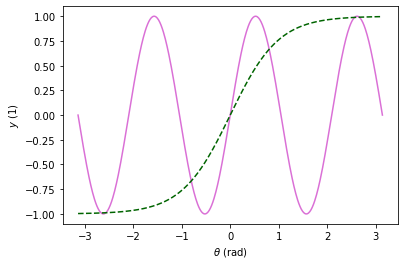

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
x = np.linspace(-np.pi, np.pi, 500)
y = np.sin(3*x)
z = np.tanh(x)

# Create figure & add plots & labels
fig, ax = plt.subplots()
ax.plot(x, y, color='orchid')
ax.plot(x, z, color='darkgreen', linestyle='--')
ax.set_xlabel('$\\theta$ (rad)')
ax.set_ylabel('$y$ (1)')

# Save figure
fig.savefig('my_figure.png') # Export in .jpg, ... also possible

Si vous regardez dans votre explorateur de fichiers √† gauche <---, vous pouvez constater qu'un fichier `.png` a bien √©t√© cr√©√©. Si vous l'ouvrez, vous pourrez probablement constater les probl√®mes suivants : 

1. La figure est petite et pixellis√©e. Par d√©faut, sa taille fait 432 x 288 pixels, ce qui est peu ...
2. L'√©tiquette des axes $y$ est coup√©e √† gauche.
3. Les polices √† l'export ne correspondent pas √† celle de Latex.

Nous allons rem√©dier √† ces trois probl√®mes dans l'ordre. Pour s'en sortir, on va devoir -- entre autres -- modifier les param√®tres par d√©faut de Matplotlib, le `plt.rcParams` que j'avais √©voqu√© [pr√©c√©demment](#pyplot-lui-meme--les-feuilles-de-style). 


##### R√©glage de la taille de la figure

Pour r√©gler la taille g√©n√©rale de la figure, on peut utiliser l'option `figsize` lors de la cr√©ation d'une figure avec `plt.figure()`, ou la r√©gler plus tard avec `fig.set_size_inches()`, qui prennent en entr√©e les m√™mes tableaux √† deux √©l√©ments `[width, height]`, en _pouces_ (_inches_ en anglais ; 1 pouce = 2.54 cm). Cette taille est la place que devra prendre votre figure dans le document dans lequel elle sera incluse, par exemple votre rapport de stage. 

_Note_ : Pour les amateurs de $\LaTeX$, sachez que vous pouvez conna√Ætre la largeur de votre colonne ou de votre texte en √©crivant dans votre document $\LaTeX$ les commandes : `\the\columnwidth` ou `\the\textwidth`. Celle-ci vous sera alors donn√©e en points typographiques (1/72 de pouce ... mais qui donc invente ces unit√©s ?!?). Je vous mets un tableau de conversion ici : 

| Name | cm     | pt    | inch   |
|------|--------|-------|--------|
| cm   | 1      | 28.35 | 0.394  |  
| pt   | 0.0353 | 1     | 0.0139 |  
| inch | 2.54   | 72    | 1      |

Ensuite, √† _taille donn√©e_ de figure, vous pouvez augmenter la _r√©solution d'impression_ de l'image, c'est √† dire le nombre de pixels ou de _points par pouce_ (_dots per inch_ ou `dpi` en anglais, `ppp` en fran√ßais). Cette option est pass√©e lors de l'appel √† `fig.savefig()`. N'h√©sitez pas √† changer la valeur par d√©faut de $72$ √† $200$, voire $250$ ! Reprenons notre code de tout √† l'heure :


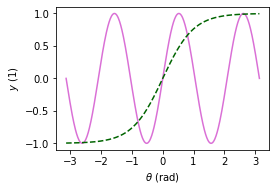

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
x = np.linspace(-np.pi, np.pi, 500)
y = np.sin(3*x)
z = np.tanh(x)

# Create figure & add plots & labels
fig, ax = plt.subplots()
fig.set_size_inches([10/2.54,7/2.54])   # I want my figure to be 10 x 7 cm 
ax.plot(x, y, color='orchid')
ax.plot(x, z, color='darkgreen', linestyle='--')
ax.set_xlabel('$\\theta$ (rad)')
ax.set_ylabel('$y$ (1)')

# Save figure
plt.tight_layout()
fig.savefig('my_figure.png', dpi=250) # Export in .jpg, ... also possible

##### Garder les labels en entier

Maintenant que notre figure n'est plus pixellis√©e, nous pouvons passer aux `labels`. Il existe en fait une solution simple pour √©viter que ceux-ci ne soient tronqu√©s. Elle consiste √† appeler la fonction `plt.tight_layout()` juste avant d'exporter votre figure. Celle-ci va _d√©caler tous vos axes_ d'une petite quantit√© jusqu'√† ce que tous les `labels` rentrent dans la `figure`. Cette fonction ne va donc pas changer la taille (en pixels) de votre figure finale. Je vous laisse le placer dans le code ci-dessus et examiner le r√©sultat :-)

##### Obtenir des belles polices 

Enfin, si vous voulez que votre texte soit beau dans le style par d√©faut de $\LaTeX$, il va falloir trifouiller dans `plt.rcParams`. Cet objet fonctionne un peu comme un dictionnaire, et __s'applique √† toutes les figures__. Les cl√©s qui nous int√©ressent sont : 

* `'text.usetex'` pour afficher le code math√©matique $\LaTeX$ en joli (on va le changer de `False` √† `True`). Cela va √©galement changer la police des nombres sur les graduations pour les afficher en `Computer Modern`, la police de $\LaTeX$.
* `'font.family'` pour choisir la police de caract√®res de la figure en dehors du code $\LaTeX$. Vous pouvez alors choisir entre les familles sans empattement (`sans-serif`), avec empattement (`serif`) , √† espacement fixe (`monospace`), ... 
* `'font.size'` pour choisir la taille par d√©faut de la police. Le choix malin est de prendre la m√™me taille que celle de votre document $\LaTeX$ :-) 

Pour modifier `plt.rcParams`, on lui applique la m√©thode `.update()` et on lui passe un dictionnaire des valeurs que nous voulons mettre √† jour. Et comme il change le fonctionnement de tout Matplotlib, on n'a pas besoin de l'appeler pour chacune des prochaines figures. Essayez par exemple de supprimer les lignes de code associ√©es √† `plt.rcParams` une fois ex√©cut√©es au moins une fois :

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# New Matplotlib parameters #######
new_params = {'text.usetex':True,
              'font.family':'serif',
              'font.size':11}
plt.rcParams.update(new_params)
###################################

# Create data
x = np.linspace(-np.pi, np.pi, 500)
y = np.sin(3*x)
z = np.tanh(x)

# Create figure & add plots & labels
fig, ax = plt.subplots()
fig.set_size_inches([10/2.54,7/2.54])   # I want my figure to be 10 x 7 cm 
ax.plot(x, y, color='orchid')
ax.plot(x, z, color='darkgreen', linestyle='--')
ax.set_xlabel('$\\theta$ (rad)')
ax.set_ylabel('$y$ (1)')

# Save figure
plt.tight_layout()
fig.savefig('my_figure.pdf', dpi=250) # Export in .jpg, ... also possible

__Et voil√†__, notre figure est bien belle !

##### Un dernier mot 

Rien ne vous emp√™che d'enregistrer votre figure dans un format diff√©rent de `.png`. Les plus esth√®tes d'entre vous peuvent exporter __dans des formats 'vectoriels' pour un r√©sultat encore plus propre √† l'impression de votre document final__, comme par exemple le `.pdf` (qui impose les polices utilis√©es par Matplotlib dans votre document final) et le `.eps` (qui lui va essayer d'utiliser les polices de votre document final dans la figure). 

#### Le module `tikzplotlib`

Si, comme moi, vous √™tes particuli√®rement _n√©vros√©_ des figures, vous aurez peut-√™tre envie de les modifier directement dans $\LaTeX$ avant de les inclure dans votre document final. Il n'est pas possible de faire directement cela sous Matplotlib, mais ... il existe ce module fort sympathique qui rem√©die au probl√®me ! On cr√©e notre figure comme pr√©c√©demment, et au lieu d'appeler `.savefig()`, on appelle `tikzplotlib.save()` √† qui on donne un nom de fichier qui va donc se finir en `.tex`. 

Le module √©tant encore √† un stade peu avanc√©, il est possible qu'il y ait des bugs. Par exemple, je ne peux pas exporter ma figure si elle contient des pointill√©s ou des lignes tiret√©es. Mais vous pourrez tr√®s vite remettre tout √ßa au propre sous TikZ !

In [ ]:
import tikzplotlib 
import matplotlib.pyplot as plt
import numpy as np

# Create data
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(3*x)
z = np.tanh(x)

# Create figure & add plots & labels
fig, ax = plt.subplots()
fig.set_size_inches([10/2.54,7/2.54])   # I want my figure to be 10 x 7 cm 
ax.plot(x, y, color='orchid')
ax.plot(x, z, color='darkgreen')
ax.set_xlabel('$\\theta$ (rad)')
ax.set_ylabel('$y$ (1)')

# Save figure
plt.tight_layout()
tikzplotlib.save('my_tikz_fig.tex')

Si vous jetez un oeil √† votre fichier export√©, il devrait ressembler √† cela :

![img](./resources/Tikz_export_matplotlib.png)

Les options et le formatage des `Axes` se trouve dans l'encadr√© vert, et les options et le formatage des `Lines` se trouve apr√®s l'instruction `\addplot`, auquel vous pouvez rajouter, par exemple, un `line style=dashed` ou `line style=dotted` qui passe tr√®s bien. Si vous √™tes motiv√©s, vous pouvez vous r√©f√©rer au manuel fort intimidant, mais quand m√™me excellent de [Pgfplots](https://pgfplots.sourceforge.net/).

Si vous voulez que ce code $\LaTeX$ compile, il va falloir lui ajouter un pr√©ambule. Vous pouvez par exemple copier celui que j'utilise en g√©n√©ral, et qui est assez exhaustif : 

```
\documentclass[border=1mm]{standalone}
\usepackage[utf8]{inputenc}
\usepackage{tikz}
\usepackage{pgfplots}
\usepackage{graphicx}
\usepackage{amssymb}
\pgfplotsset{compat=1.17}
\usetikzlibrary{arrows.meta}
\usepgfplotslibrary{colorbrewer}
\usetikzlibrary{decorations}
\usepgfplotslibrary{fillbetween}
\begin{document}

```
N'oubliez pas d'ajouter _√©galement_ un `\end{document}` tout en bas de votre fichier TikZ, en tout cas apr√®s le `\end{tikzpicture}`.

----------------------------------------------

### Animations et figures interactives

Impossible n'est pas Matplotlib ! Celui-ci est en effet capable de tracer __dans notre environnement__ (cf [FAQ](./FAQ.md)) des figures anim√©es, et des figures interactives, c'est √† dire qui vont se mettre √† jour quand l'utilisateur va cliquer sur un bouton, r√©gler une valeur, etc. Ces fonctionnalit√©s _avanc√©es_ ne demandent pas beaucoup plus de code, mais prennent g√©n√©ralement un petit bout de temps avant de s'ex√©cuter, il vaut mieux donc √™tre prudent :-)

Dans tous les cas, nous __sommes oblig√©s__ d'utiliser la commande `%matplotlib widget` pour que les animations ou les trac√©s interactifs fonctionnent correctement. 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib widget

#### Figures anim√©es 

Les figures anim√©es font directement partie de Matplotlib dans le sous-module `matplotlib.animation`. Il va donc falloir que nous l'importions en premier lieu. La syntaxe est ensuite un peu √©trange : on va cr√©er la figure, puis une fonction qui va la mettre √† jour en fonction d'un indice $i$. Dans mon cas, `update_figure()` va aller √©craser les donn√©es $x$, $y$ et $z$ dans l'objet `l3d` d√©j√† existant gr√¢ce √† la m√©thode `.set.data()` (pour $x$ et $y$) et `set_3d_properties()` (pour $z$). __Elle doit renvoyer tous les objets qui sont mis √† jour dans l'animation ; vous pouvez les mettre ensemble dans un tuple, ou dans une liste__.

Il nous reste ensuite √† appeler la fonction `anim.FuncAnimation`, qui prend en entr√©e : 
* la figure √† animer, chez nous `fig`.
* `func`, la fonction qui sert √† mettre √† jour la figure, chez nous on aura `func=update_figure`.
* `frames`, le nombre d'images √† calculer, qui peut √™tre un entier ou une liste de valeurs.
* `interval`, l'intervalle (si l'ordinateur est suffisamment rapide) entre deux images en ms.
* `repeat` (vrai ou faux) pour r√©p√©ter l'animation.
* `blit` (vrai ou faux), pour ne pas retracer l'image en entier √† chaque pas d'animation.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import numpy as np

%matplotlib widget

# Function that computes z = f(x,y), works if x, y are scalars, 1d or 2d
def height(X,Y):
    return 3*np.sinc(np.sqrt(X**2+Y**2)) + np.arctan(X+Y)

# Generating surface and line data
x1 = np.linspace(-5,5,200)
y1 = 0*x1
z1 = height(x1,y1)             # Basically z = f(x,0) for my line
[X,Y] = np.meshgrid(x1,x1)    # Creating the mesh with big, 2D X and Y
Z = height(X,Y)             

# Creating the figure, axes, surface and line
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(projection='3d')
sf = ax.plot_surface(X,Y,Z, cmap='Spectral', alpha=0.5)             # Alpha = 0.5 for transparency
ln1, = ax.plot3D(x1, y1, z1, color='black', linewidth=2)

# Creating a function to update the figure that will be called by the FuncAnimation function
# Basically our function applies a new x, y, z for the line and a nice slow rotation of the camera
def update_figure(frame):           
    y1 = frame*np.ones_like(x1)               # Transforming y value into y 1D array
    ln1.set_data(x1,y1) 
    ln1.set_3d_properties(height(x1,y1))
    return [ln1,]                            # Send back the updated line for FuncAnimation (used below) as a list                           

# Call the animation
my_anim = anim.FuncAnimation(fig, func=update_figure, frames=np.linspace(-5,5,200), interval=50)

__Exercice__ : Ajoutez une deuxi√®me ligne anim√©e perpendiculaire √† la premi√®re et de couleur grise. Essayez √©galement de coder une belle "rotation" de votre trac√© en m√™me temps que la ligne noire se d√©place.

_Note_ : La fonction `animation.FuncAnimation` ne vous renverra pas d'erreurs m√™me si la fonction `func`  (dans notre cas, `update_figure()`) plante ... oups ! Si vous voulez √™tre s√ªr qu'elle ne d√©ocnne pas, commentez la ligne de l'animation et appelez directement `func()` avec une valeur de `frame` au pif. Vous verrez alors si votre fonction pass√©e √† `animation.FuncAnimation` plante.

Vous pouvez ensuite transformer votre figure en vid√©o, si vous le souhaitez. Dans ce cas, appliquez la m√©thode `.to_html5_video()` √† votre animation, et appelez le tout avec la fonction `HTML` du sous-module `IPython.display` (Jupyter est bas√© sur IPython). Vous pouvez ensuite sauver l'animation sous format vid√©o via les trois points verticaux en bas √† droite de l'animation. Parfois, les animations sont un peu saccad√©es quand il y a beaucoup de choses √† afficher, mais ces soucis disparaissent √† l'export en vid√©o :-)

In [ ]:
from IPython.display import HTML
HTML(my_anim.to_html5_video())

#### Trac√©s interactifs

Les trac√©s ci-dessus sont _anim√©s_, mais pas vraiment _interactifs_ : par exemple, je ne peux pas d√©cider de r√©gler la position de ma ligne noire √† la souris. Dans cette section, nous allons voir comment faire pour mettre en place des boutons, des ascenseurs, etc., qu'on appelle `widgets` qui nous permettent de modifier des parties d'une figure _une fois trac√©e_. On va commencer simplement. La syntaxe du programme suivant est assez proche de celle utilis√©e pour l'animation : 

* on cr√©e les parties statiques de la figure, ici ce qu'il y a sous la fonction `my_gaussian()`
* on cr√©e une fonction qui met √† jour la figure / les axes / la ligne √† partir de valeurs (ici, `update_figure()` √† nouveau)

√Ä la diff√©rence de `animation.FuncAnimation`, on va ici appeler la fonction `interact` du module `ipywidgets`. Elle prend en entr√©e la fonction qui met √† jour la figure, `update_figure()`, et on lui passe ensuite tous les param√®tres qu'on veut pouvoir r√©gler dans l'animation un par un, dans notre cas `avg` et `std`. 

Vous devrez sp√©cifier les _plages_ de valeurs que peuvent prendre ces param√®tres. En fonction de la mani√®re dont vous les sp√©cifiez, `ipywidgets.interact()` va choisir des boutons, des listes d√©roulantes pour s'adapter au contenu : 

* pour avoir une glissi√®re (_slider_), vous devez √©crire `avg=(low_val, hi_val, step)`
* pour obtenir une liste d√©roulante, vous pouvez lui pr√©ciser une `list`, un `range` ou un `np.ndarray` ...
* pour avoir une case √† cocher, pr√©cisez simplement `True` ou `False`

_Note_ : certains de ces widgets ne fonctionnent pas sous Visual Studio Code mais fonctionnent bien depuis votre navigateur internet. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib widget

# This computes y values of a Gaussian distribution
# for a given x and parameters
def my_gaussian(x, parameters):
    avg, std = parameters
    return 1/(2*np.pi)**0.5/std*np.exp(-(x-avg)**2/(2*std**2))

# Figure setup
fig, ax = plt.subplots()
x = np.linspace(-10,10,500)
y = my_gaussian(x, [0,1])
lin, = ax.plot(x, y, 'k')
ax.set_xlim([-10,10])
ax.set_ylim([0,1])

# Update figure routine
def update_figure(avg=0.0, std=1.0):
    y = my_gaussian(x, [avg,std])
    lin.set_data(x, y)

anim = interact(update_figure, avg=(-5,5,0.1), std=(0.1,3,0.1))

__Exercice__ : Essayez de rajouter deux fonctionnalit√©s √† mon trac√© interactif, le style du trac√©, choisi selon une liste, et sa couleur, choisie √©galement selon une liste d√©roulante. Si vous ne travaillez pas sous Visual Studio, vous pouvez √©galement essayer d'inclure une bo√Æte de texte qui va mettre √† jour le titre ou le `xlabel` de votre figure. 

------------------------------

__F√©licitations__ ! Vous √™tes maintenant un professionnel de Matplotlib ! Il existe bien s√ªr quelques autres types de reor√©sentation graphiques, mais je pense que vous serez capable de les tracer vous-m√™mes en lisant [la documentation en ligne de Matplotlib](https://matplotlib.org/stable/api/index.html). Maintenant, vous pouvez √©galement tester les alternatives de Matplotlib: [Bokeh](https://bokeh.org/), [Plotly](https://plotly.com/), [Alta√Ør](https://altair-viz.github.io/gallery/diverging_stacked_bar_chart.html), ... üòú